<a href="https://colab.research.google.com/github/mianshariq/621/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this HW, we will be comparing the

In [128]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt


In [129]:
df=pd.read_csv('https://github.com/mianshariq/Datasets/raw/c2988a68233915e5ad6fa6ade4bade3adc491b78/IIJAFUNDINGASOFMARCH2023.csv')
pop=pd.read_csv('https://github.com/mianshariq/Datasets/raw/841b30223b09371b67df55d6d8ae2d4678663a39/NST-EST2022-POP.csv')
votes=gpd.read_file('https://github.com/mianshariq/Datasets/raw/eea22863d89258abfe71cc69871a248c0373eda8/Popular%20vote%20backend.csv')
data=gpd.read_file('https://github.com/mianshariq/Datasets/raw/dd792f49b511bdb836371df436cdb05b5730667a/gz_2010_us_040_00_500k_V2.json')



In [130]:
pop['States'] = pop['States'].str.upper()
votes['State'] = votes['State'].str.upper()
data['NAME'] = data['NAME'].str.upper()

In [131]:
pop.rename(columns={'States': 'State, Teritory or Tribal Nation'}, inplace=True)
pop.rename(columns={'2022': '2022_Population'}, inplace=True)
votes.rename(columns={'State': 'State, Teritory or Tribal Nation'}, inplace=True)
data.rename(columns={'NAME': 'State, Teritory or Tribal Nation'}, inplace=True)


In [132]:
votes = votes.drop(columns="geometry")

In [133]:
pop['2022_Population'] = pd.to_numeric(pop['2022_Population'].str.replace(',', ''), errors='coerce').astype(int)

In [134]:
# Replace 'state_code_column' with the actual column name that contains the state codes in both DataFrames.
gdf = data.merge(df, on='State, Teritory or Tribal Nation', how='inner').merge(votes, on='State, Teritory or Tribal Nation', how='left').merge(pop, on='State, Teritory or Tribal Nation', how='left')

In [135]:
gdf= gdf[~gdf['State, Teritory or Tribal Nation'].isin(['NORTHERN MARIANA ISLANDS', 'TRIBAL COMMUNITIES', 'AMERICAN SAMOA', 'GUAM', 'US VIRGIN ISLANDS' ])]
gdf['Rank_IA'] = gdf['Total (Billions)'].rank(method='dense', ascending=False)
gdf['Rank_pop'] = gdf['2022_Population'].rank(method='dense', ascending=False)
gdf = gdf.sort_values(by=['Rank_IA'], ascending=[True])
gdf['bias'] = gdf['Rank_IA'] - gdf['Rank_pop']

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [173]:
gdf['Rank_IA'] = gdf['Rank_IA'].astype(int)
gdf['Rank_pop'] = gdf['Rank_pop'].astype(int)
gdf['bias'] = gdf['bias'].astype(int)
gdf.head(7)


,GEO_ID,STATE,"State, Teritory or Tribal Nation",LSAD,CENSUSAREA,geometry,Total (Billions),Party,2022_Population,Rank_IA,Rank_pop,bias
27,0400000US06,06,CALIFORNIA,,155779.220,"MULTIPOLYGON (((-122.44632 37.86105, -122.4385...",18.4,D,39029342.0,1,1,0
17,0400000US48,48,TEXAS,,261231.711,"MULTIPOLYGON (((-97.13436 27.89633, -97.13360 ...",14.2,R,30029572.0,2,2,0
11,0400000US36,36,NEW YORK,,47126.399,"MULTIPOLYGON (((-71.94356 41.28668, -71.92680 ...",10.1,D,19677151.0,3,4,-1
35,0400000US17,17,ILLINOIS,,55518.930,"POLYGON ((-87.53233 39.99778, -87.53254 39.987...",8.4,D,12582032.0,4,6,-2
31,0400000US12,12,FLORIDA,,53624.759,"MULTIPOLYGON (((-85.15641 29.67963, -85.13740 ...",8.2,R,22244823.0,5,3,2
14,0400000US42,42,PENNSYLVANIA,,44742.703,"POLYGON ((-75.41504 39.80179, -75.42804 39.809...",8.1,D,12972008.0,6,5,1
13,0400000US39,39,OHIO,,40860.694,"MULTIPOLYGON (((-82.81349 41.72347, -82.81049 ...",6.6,R,11756058.0,7,7,0


<ipython-input-175-efae1117a794>:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Total (Billions)']):


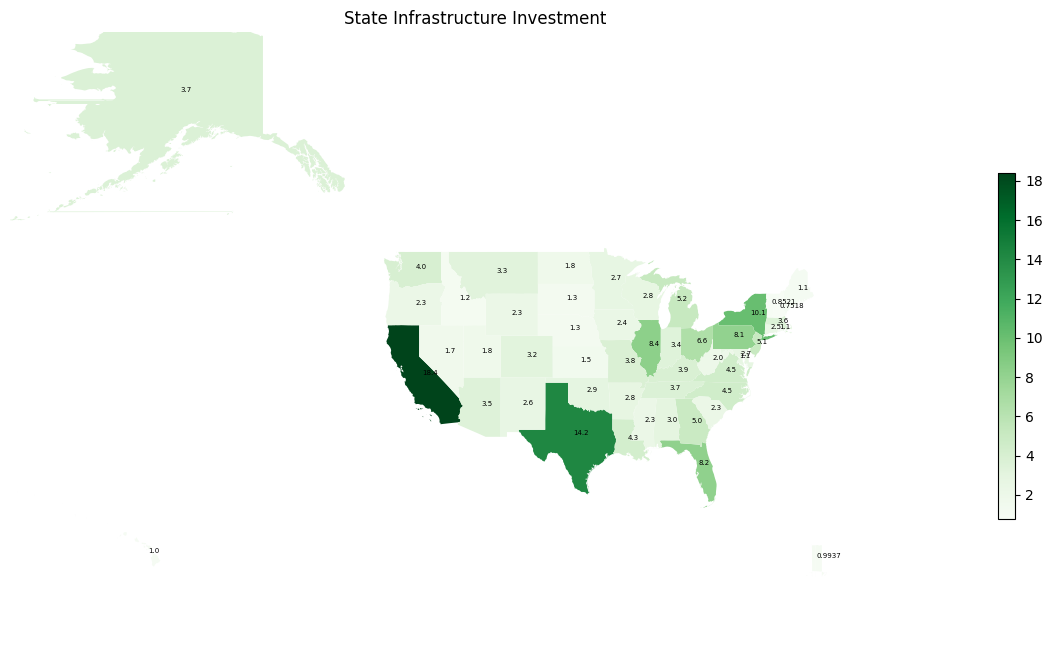

In [175]:
# Plot the GeoDataFrame with population as a color map.
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf.plot(column='Total (Billions)', cmap='Greens', legend=True, ax=ax, legend_kwds={'shrink': 0.3})
# Set the limits of the axes to zoom in on a specific region (adjust the values as needed)
ax.set_xlim(-175, -50)  # Set the x-axis limits
ax.set_ylim(10, 70)  # Set the y-axis limits
ax.set_title('State Infrastructure Investment')
plt.axis('off')
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Total (Billions)']):
    ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=5)
plt.show()


<ipython-input-174-6338377abda9>:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Rank_pop']):


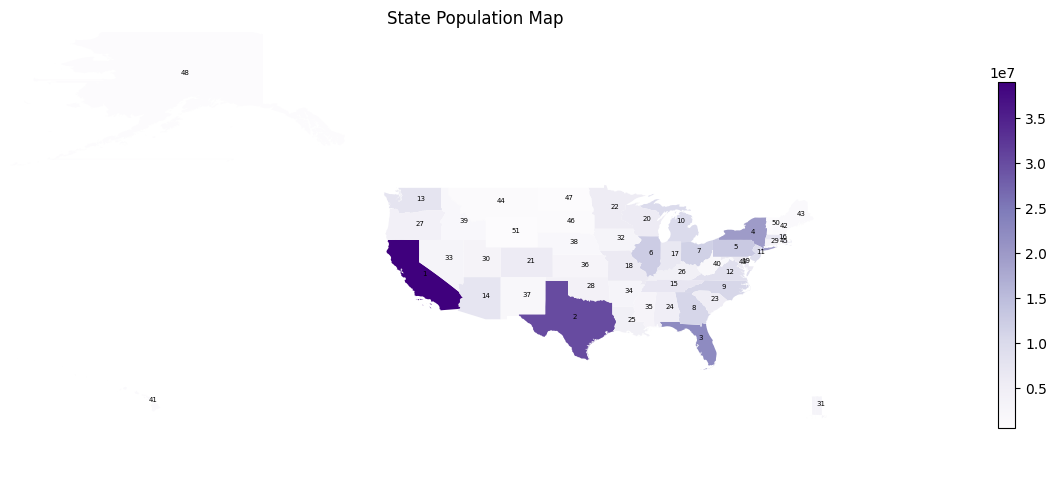

In [174]:
# Plot the GeoDataFrame with population as a color map.
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf.plot(column='2022_Population', cmap='Purples', legend=True, ax=ax, legend_kwds={'shrink': 0.3})
ax.set_aspect('equal')
# Set the limits of the axes to zoom in on a specific region (adjust the values as needed)
ax.set_xlim(-175, -50)  # Set the x-axis limits
ax.set_ylim(10, 70)  # Set the y-axis limits
ax.set_title('State Population Map')
plt.axis('off')
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Rank_pop']):
    ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=5)
plt.show()


<ipython-input-179-96eff83f0dfe>:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Party']):


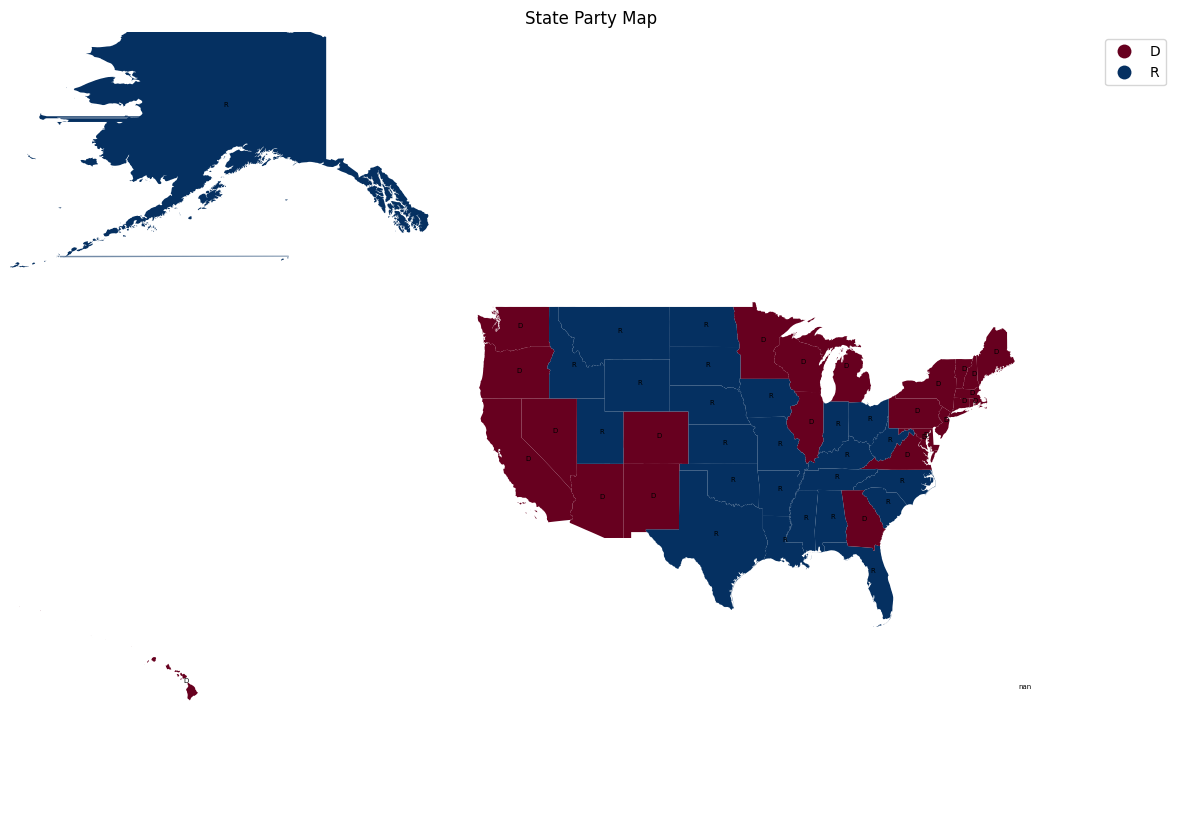

In [179]:
# Plot the GeoDataFrame with population as a color map.
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf.plot(column='Party', cmap='RdBu', legend=True, ax=ax)
# Set the limits of the axes to zoom in on a specific region (adjust the values as needed)
ax.set_xlim(-175, -50)  # Set the x-axis limits
ax.set_ylim(10, 70)  # Set the y-axis limits
ax.set_title('State Party Map')
plt.axis('off')
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Party']):
    ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=5)
plt.show()


<ipython-input-159-1cbeb62e9801>:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Party']):


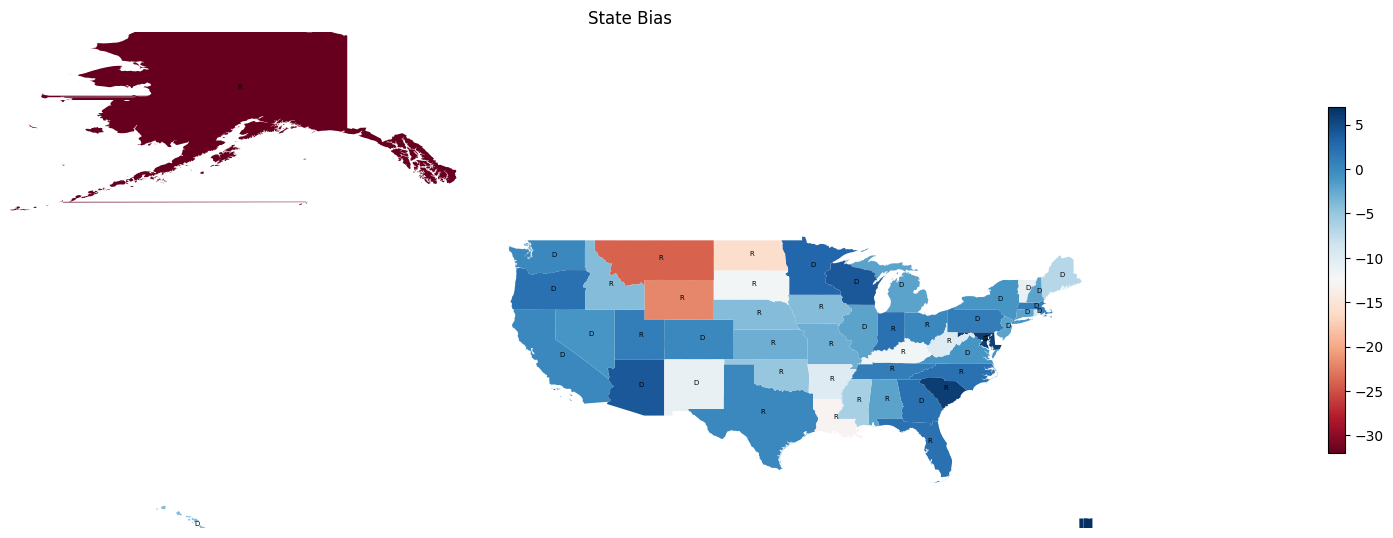

In [159]:
# Plot the GeoDataFrame with population as a color map.
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
gdf.plot(column='bias', cmap='RdBu', legend=True, ax=ax, legend_kwds={'shrink': 0.3})
# Set the limits of the axes to zoom in on a specific region (adjust the values as needed)
ax.set_aspect('equal')
ax.set_xlim(-175, -50)  # Set the x-axis limits
ax.set_ylim(20, 70)  # Set the y-axis limits
ax.set_title('State Bias')
plt.axis('off')
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Party']):
    ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=5)
plt.show()


In [148]:
df.groupby('Party').sum()

<ipython-input-148-1b79353d451f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf.groupby('Party').sum()


,CENSUSAREA,Total (Billions),2022_Population,Rank_IA,Rank_pop,bias
Party,,,,,,
D,1287486.701,102.3039,188684932.0,533.0,578.0,-45.0
R,2242470.188,88.5000,143584229.0,549.0,717.0,-168.0


In [180]:
102,300,000,000/188

542.5531914893617

In [181]:
885000/143

6188.811188811189